# Network graph of Enron Employees with the most email exchanges


As part of the analysis of the Enron Email Corpus, I looked the employees between whom the most email exchanges occurred.

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from os import path
import networkx as nx
import plotly as py
import plotly.graph_objects as go
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 10]
#print(os.getcwd())

In [3]:
dataset=pd.read_csv(r"c:\Users\faria\Documents\code\final project\dictenron.csv")

In [6]:
pd.set_option("display.max_columns",15)
pd.set_option("display.max_rows",15)
pd.set_option("display.width",15)

This Dataset is a subset of the original Enron Dataset. All the 'From' field email addresses without the "@enron.com" endings were removed. I wanted to know about which Enron employees were sending out the mosts Emails. This subset dataset contains around 42,500 emails.

In [4]:
dataset

,Subject,Date,From(email),To(email),EmailContent,Spam,NotEnron
0,re:spreads,"Wed, 13 Dec 2000 13:09:00 -0800 (PST)",john.arnold@enron.com,slafontaine@globalp.com,saw a lot of the bulls sell summer against len...,1,0
1,re:summer inverses,"Mon, 11 Dec 2000 08:51:00 -0800 (PST)",john.arnold@enron.com,slafontaine@globalp.com,amazing how with cash futures at $1 and the ba...,1,0
2,Re: congrats,"Tue, 17 Oct 2000 11:56:00 -0700 (PDT)",john.arnold@enron.com,jennifer.fraser@enron.com,We both thank you\n\n\n \n\t\n\t\n\tFrom: J...,1,0
3,Re: Hi,"Tue, 17 Oct 2000 10:36:00 -0700 (PDT)",john.arnold@enron.com,jenwhite7@zdnetonebox.com,"So, what is it? And by the way, don't start ...",1,0
4,Re: Thursday meeting,"Tue, 17 Oct 2000 10:33:00 -0700 (PDT)",john.arnold@enron.com,msagel@home.com,"sure, stop by and we'll arrange a place to mee...",1,0
...,...,...,...,...,...,...,...
42471,FW: click on z link,"Wed, 1 Aug 2001 15:20:16 -0700 (PDT)",matthew.lenhart@enron.com,jason.wolfe@enron.com,"\n\n -----Original Message-----\nFrom: \t""Ryan...",1,0
42472,FW: StealthBomer Flying,"Tue, 20 Nov 2001 11:26:32 -0800 (PST)",matthew.lenhart@enron.com,jason.wolfe@enron.com,\n\n -----Original Message-----\nFrom: \tEric ...,1,0
42473,FW: [Fwd: a day in the life],"Tue, 27 Nov 2001 14:42:38 -0800 (PST)",matthew.lenhart@enron.com,jason.wolfe@enron.com,\n\n -----Original Message-----\nFrom: \tLuis ...,1,0
42474,EOL Team Connection to Operations,"Mon, 21 May 2001 15:38:55 -0700 (PDT)",sally.beck@enron.com,andy.zipper@enron.com,I left you a couple of messages with two diffe...,1,0


I need a way to collect email exchanges and their counts and I thought a dictionary would be the simplest way to keep track of this. So I created a function to help do this.

In [5]:
#nested dictionary
#create dictionary to collect emails from From(email) column where value is a dictionary containing the to(email) as a key and counter of the number of the times this to(email) is seen
def pairemails(dataset):
    pairs={}
    frequency={}
    for index in range(len(dataset["From(email)"])):
        if dataset["From(email)"][index] not in pairs:
            pairs[dataset["From(email)"][index]]=frequency
        if dataset["To(email)"][index] not in frequency:
            frequency[dataset["To(email)"][index]]=1
        else:
            frequency[dataset["To(email)"][index]]+=1
    return pairs

In [7]:
emaildict=pairemails(dataset)

After creating a nested dictionary of containing email addresses as keys and having its values be a dictionary containing whose key is another email address and whose value is the number of email exchanges, we must unpack this datastructure into a tuple in order for the NetworkX functions to process the information

In [10]:
flist=[]
def dtotup(dictionary):
    for k,v in dictionary.items():
        for i,j in v.items():
            if j>500: # if the number of time the email the senders and recievers have exchanged emails is over
                flist.append((k,i,j))
    return flist

In [11]:
graphtup=dtotup(emaildict)

Below is a depiction of the the email pairs and the number of email exchanges they shared

In [12]:
graphtup

[('john.arnold@enron.com', 'pete.davis@enron.com', 4498),
 ('john.arnold@enron.com', 'suzanne.adams@enron.com', 606),
 ('john.arnold@enron.com', 'vkaminski@aol.com', 2743),
 ('sara.shackleton@enron.com', 'pete.davis@enron.com', 4498),
 ('sara.shackleton@enron.com', 'suzanne.adams@enron.com', 606),
 ('sara.shackleton@enron.com', 'vkaminski@aol.com', 2743),
 ('tana.jones@enron.com', 'pete.davis@enron.com', 4498),
 ('tana.jones@enron.com', 'suzanne.adams@enron.com', 606),
 ('tana.jones@enron.com', 'vkaminski@aol.com', 2743),
 ('kay.mann@enron.com', 'pete.davis@enron.com', 4498),
 ('kay.mann@enron.com', 'suzanne.adams@enron.com', 606),
 ('kay.mann@enron.com', 'vkaminski@aol.com', 2743),
 ('matthew.lenhart@enron.com', 'pete.davis@enron.com', 4498),
 ('matthew.lenhart@enron.com', 'suzanne.adams@enron.com', 606),
 ('matthew.lenhart@enron.com', 'vkaminski@aol.com', 2743),
 ('sally.beck@enron.com', 'pete.davis@enron.com', 4498),
 ('sally.beck@enron.com', 'suzanne.adams@enron.com', 606),
 ('sall

Now we use the NetworkX library and documenation to take the tuples and transform them into a graph. The multi-digraph accomodates multiple edges to and from nodes. This is relevant in our use case as email can be sent between multiple senders and recievers

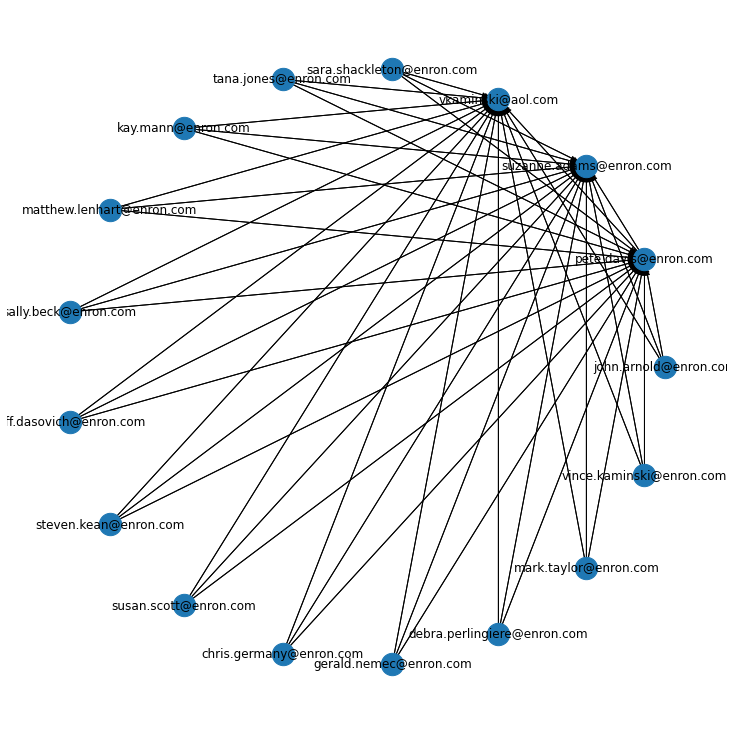

Total number of nodes:  17
Total number of edges:  45


In [13]:
G=nx.MultiDiGraph()
G.add_edges_from(graphtup)
nx.convert_node_labels_to_integers(G, first_label=1, ordering='increasing degree')
#G.add_nodes_from(graphtup)
nx.draw_circular(G)
pos=nx.circular_layout(G, scale=1, center=None, dim=2)
nx.draw_networkx(G, pos=pos, node_size=500)

plt.show()

#nx.convert_node_labels_to_integers(G, first_label=0, ordering='default', label_attribute="Title")
#plt.figure(figsize=(100,100))

print("Total number of nodes: ", int(G.number_of_nodes()))
print("Total number of edges: ", int(G.number_of_edges()))

And voila! we have a network graph. we can see based on the number of incoming edges on 3 specific nodes that Vince Kaminski, Suzanne Adams and Pete Davis had the most incoming emails. This may be an indication of a high rank within the organization.

In [11]:
G.nodes()

NodeView(('john.arnold@enron.com', 'pete.davis@enron.com', 'suzanne.adams@enron.com', 'vkaminski@aol.com', 'sara.shackleton@enron.com', 'tana.jones@enron.com', 'kay.mann@enron.com', 'matthew.lenhart@enron.com', 'sally.beck@enron.com', 'jeff.dasovich@enron.com', 'steven.kean@enron.com', 'susan.scott@enron.com', 'chris.germany@enron.com', 'gerald.nemec@enron.com', 'debra.perlingiere@enron.com', 'mark.taylor@enron.com', 'vince.kaminski@enron.com'))

In [66]:
G.edges()

OutMultiEdgeDataView([('john.arnold@enron.com', 'pete.davis@enron.com'), ('john.arnold@enron.com', 'suzanne.adams@enron.com'), ('john.arnold@enron.com', 'vkaminski@aol.com'), ('pete.davis@enron.com', 'pete.davis@enron.com'), ('pete.davis@enron.com', 'suzanne.adams@enron.com'), ('pete.davis@enron.com', 'vkaminski@aol.com'), ('sara.shackleton@enron.com', 'pete.davis@enron.com'), ('sara.shackleton@enron.com', 'suzanne.adams@enron.com'), ('sara.shackleton@enron.com', 'vkaminski@aol.com'), ('tana.jones@enron.com', 'pete.davis@enron.com'), ('tana.jones@enron.com', 'suzanne.adams@enron.com'), ('tana.jones@enron.com', 'vkaminski@aol.com'), ('kay.mann@enron.com', 'pete.davis@enron.com'), ('kay.mann@enron.com', 'suzanne.adams@enron.com'), ('kay.mann@enron.com', 'vkaminski@aol.com'), ('matthew.lenhart@enron.com', 'pete.davis@enron.com'), ('matthew.lenhart@enron.com', 'suzanne.adams@enron.com'), ('matthew.lenhart@enron.com', 'vkaminski@aol.com'), ('sally.beck@enron.com', 'pete.davis@enron.com'), (

# References
- https://plotly.com/ipython-notebooks/network-graphs
- https://networkx.org/documentation/networkx-1.10/reference/classes.multidigraph.html